
<img src="https://drive.google.com/uc?export=view&id=1FUSWDRDDflxrUrYBFPKHE50KrelBYO6N" style="width:50%" align="centre">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/University_of_Sussex_Logo.svg/1024px-University_of_Sussex_Logo.svg.png" style="width:50%;"  height="500" width="500" align="centre">



<!---weird that to put it in the middle I have to align it to the right-->

<!--- Centering appears to be a little difficult to do exactly, like the above image is aligned to the right and isn't centered -->
# Using Machine Learning to Find Dark Matter: Searching For the Invisible
### What Will We Do in This Notebook?
In this notebook we are going to look at data produced by the [ATLAS](https://atlas.cern/) group and see if we can confirm that there is dark matter in that data. 
<br>We have an idea of what dark matter would look like if it were found at ATLAS (we call this the signature), so we need to check if the dark matter data that we will look at in this notebook (which we call our signal) matches this signature. However there are other processes that can be detected that have a simillar signature to that of dark matter, so we will also analyse these (which we call the background).
<br>
We will do this analysis to collect more of our dark matter signal compared to the background. Then we will see if this is enough to show that we really have dark matter (and not something similar) by calculating a ratio between the signal and background.
<br><br>
Let's start off by running a little bit of code to get some boring stuff out of the way, <font color="red">**click the play symbol**</font> next to the code (you will have to click play every time you see it in order to run all the code).

In [ ]:
#importing some packages that will get used later on
from IPython.display import HTML #used to embed videos using HTML
import ipywidgets as widgets #used to create interactive elements within the notebook

## 1 - Introduction
Before we begin searching for dark matter, let's have a look at some of the background physics knowledge so that we have an idea of what exactly this elusive dark matter is.


### 1.1 - Overview of Particle Physics and the Standard Model

Our universe is built from tiny building blocks that are smaller than atoms, and particle physics aims to find out what these building blocks called particles are and how they interact with one another. These building blocks are part of what is called the standard model. This is what particle physicists such as those working at [CERN](https://home.cern/) investigate.
<br>
<br>
The following video provides a more in-depth explanation of the Standard Model and its importance to particle physics:




In [ ]:
#@title
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ehHoOYqAT_U" frameborder="0" allowfullscreen></iframe>')

So what we saw in this video is that the standard model is made up of particles that can't be split into anything smaller. These particles can explain a large number of phenomena that happen in our daily lives, such as how charged electrons play an important role in electricity.<br>
As the video discussed, lots of research into these fundamental particles is performed at ATLAS, one of the detectors at CERN.

### 1.2 - The ATLAS detector
The ATLAS detector is a general-purpose particle detector used to detect the particles that come out of the collisions of the Large Hadron Collider (LHC).<br>
<br>
The Large Hadron Collider is a particle accelerator that accelerates particle-beams very close to the speed of light, and smashes them together millions of times per second inside detectors like ATLAS. When these beams collide a shower of particles is produced, and some of these particles are very rare so we use sophisticated detectors like ATLAS to study them - have a closer look at ATLAS [here](https://atlas.cern/Discover/Detector)!

<img src="https://drive.google.com/uc?export=view&id=1PSDruPabZjbtq-0rGEVtU2zFjr-hTitj" style="width:50%;" align="centre">
<br>
<br>

<font color="red">QUIZ:</font> ATLAS is much bigger than a person, but how big is it exactly? Hit play on the cell below to run a quick quiz!



In [ ]:
#@title
print("           How long is the ATLAS detector?")
out = widgets.Dropdown(options=[('46 cm',0),('40 m',0),('46 m',1),('36 m',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

           How long is the ATLAS detector?


### 1.3 - Dark Matter
As the video you watched earlier mentioned, the Standard Model does not explain everything and has some gaps. One of the most significant gaps is explaining dark matter. But what is dark matter?
<br>
<br>
Dark matter is a type of matter which we cannot directly see or observe, which is why we call it 'dark'. The reason we can't see dark matter is because it does not interact with the electromagnetic force, meaning that regular observation methods (such as using light to see it in space, or using charge to look at electrical interactions) don't work for observing it. So if we can't even see dark matter, how do we even know it's there? Have a look at the video below to learn a more about dark matter (and dark energy).


In [ ]:
#@title
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/QAa2O_8wBUQ" frameborder="0" allowfullscreen></iframe>')

### 1.4 - ATLAS And Dark Matter
So how are we looking for dark matter using ATLAS?
<br>
First we need to know exactly what kind of dark matter we are looking for. The theoretical dark matter particle we will be looking for in this notebook is a Weakly Interacting Massive Particle ([WIMP](https://www.universetoday.com/41878/wimps/)), although there are other dark matter candidates out there.
<br><br>
As you can guess from the name, this type of dark matter particle is hard to detect because it doesn't really interact with other things. For example WIMPs don't interact with [electromagnetic radiation](https://imagine.gsfc.nasa.gov/science/toolbox/emspectrum1.html), such as light. Hence, we can't see them! So, how do we find dark matter using ATLAS?
<br><br>
If dark matter particles are produced at ATLAS, we would not be able to directly see them, but we would be able to see the effect that they have on the collision that the were created from. What is this effect?
<br><br>
If you throw a ball against a wall, it bounces back. Similarly, if you throw two balls at each other, the bounce away from each other. This makes sense because momentum is always conserved. You can see this example being used in the below video.

In [ ]:
#@title
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/4IYDb6K5UF8" frameborder="0" allowfullscreen></iframe>')

So how does this relate to us finding dark matter? If our particle collisions produce dark matter which is invisible, it will look like the the momentum of the visible particles is not in the right direction and thus not conserved, which we call missing momentum. This is represented by the green line in the below image. 
<br>
<br>
In our case we will be looking at *missing energy*, which is closely related to the momentum ([this image](https://pbs.twimg.com/media/EGGV-R4UEAAds9a.jpg) shows how they are related - does it look similar to another famous equation?). Specifically we will look at the *missing transverse energy*, which is the missing energy perpendicular to the particle beam (instead of being along the beam, the missing energy is at right angles and coming out of the detector like in the below image)
<br>
<br>
What we look for from a particle collison, is the resulting particles and information (such as the missing transverse energy) picked up by the detector after the collision, which we call the signature. In the case of our dark matter, this signature is a pair of leptons (such as electron-positron, or muon-antimuon) and the missing transverse energy we just discussed. This lepton pair must also be produced by a Z boson, the 2.3.2. dropdown section has more information on how these particles are produced.
<img src="https://pbs.twimg.com/media/EIOEvr2XYAAzF37.jpg" style="width:50%;" align="right">

<font color="red">QUIZ:</font> Hit play below to see what you know about dark matter!

In [ ]:
#@title
print("           Why is it difficult to detect dark matter?")
out = widgets.Dropdown(options=[('It is too massive (heavy) to detect.',0),('It only interacts with the weak force.',1),('We are using the wrong wavelength to detect it.',0),('It only interacts with the electromagnetic force.',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

           Why is it difficult to detect dark matter?


## 2 - Setting Up Data For Analysis
Now that we understand what dark matter is a bit better we can start to look for it. But before  we do any kind of analysis we need to get everything ready. This means we have to prepare the data so that we can analyse it to search for dark matter created at the LHC.


### 2.1 - What is Python?
Python is a programming language that has a focus on readability and modularity. This is great for scenarios such as collaborations, where multiple people have to be aable to read and understand the same code. This entire notebook is written almost entirely in Python for example.
<br>
You can learn more about Python [here](https://opensource.com/resources/python). 

You already know that you can run cells with code by hitting the play button but you can also use *Shift+Enter* to do the same. 
<br>
<br>
<font color="red">TASK:</font> Complete the cell below to print out some text and do a calculation.

In [ ]:
#fill in the space with an ellipse (...)
print("Seven plus two is",7+2) #The comma here seperates the text(called a string) and the calculation, otherwise it won't work
#also the stuff written after a '#' is called a comment, and allows you to write stuff that won't be run as code

Seven plus two is 9


### 2.2 - What are packages?
When we want to do something specific in Python, we might not have all the tools we need to do so. But as we noted before Python is very modular which means we can import packages into our code that give us additional functionality, allowing to us perform more specific tasks.
<br>
<br>
We can think of a package as something that essentially gives us more tools that we can use in our code. You might remember that we imported a couple modules at the start of the notebook to make some of the interactive parts of this module work. Below we'll now import some modules that will be helpful for our data analysis below:
* NumPy - numpy is useful for its mathematical functions and the arrays it lets us use (arrays are like tables, and we can do stuff to whats in the table)
* PyPlot - pyplot is great for making plots, which helps us undderstand patterns in data easily
* pandas - pandas is great for data analysis, it gives us a more useful version of an array (called a dataframe) which we can do more thourough analysis on

In [ ]:
import numpy as np #useful for mathmatical functions and arrays
import matplotlib.pyplot as plt #useful for making plots
import pandas as pd #useful for data analysis and dataframes (to put data into)

If you want to know more about these three packages, look at the websites for [NumPy](https://numpy.org/), [PyPlot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html), and [pandas](https://pandas.pydata.org/).

### 2.3 - Getting our data ready

Now that we have imported the packages we want to use, let's get the files we want into the workbook and ready to use for our analysis. First we'll put the file information into dataframes that we can work with.
<br>
<br>
So what do the files we will use mean?
<br>
<br>
The <font color='magenta'>'DM_300'</font> file is the file that has the dark matter we are searching for, so we call this the <font color='magenta'>signal</font> file. The other files (<font color='olive'>'Non-resonant_ll', 'Z+jets', 'WZ', 'ZZ'</font>) refer to other particle physics processes that appear similar to the process that produces dark matter, we call these the <font color='olive'>background</font> files. Click on the dropdown for section 2.3.1. to learn a bit more about our files.
<br>
<br>
run the below cell to read the data we will use into this notebook.

<html>
<details>
<summary style="color:orange; font-weight: bold;">2.3.1 - What is data?</summary>

These files are in fact not actual data recorded from collisions at ATLAS, they are simulations created to look like what would happen during collisions at the detector (specifically simulations of 13 TeV proton-proton collisions at the Large Hadron Collider).
<br>
<br>
How do we simulate all the events that occur in particle collisions? We use the physics that we know to create a [mathematical model](https://www.mathsisfun.com/algebra/mathematical-models.html) of particle collisions and then we use this model to produce simulated data. In this process randomly generated data helps to make sure that the simulated data looks realistic - this is made using the [monte carlo method](https://www.youtube.com/watch?v=7ESK5SaP-bc).
<br>
<br>
Another thing to consider is that the number of monte carlo simulated events we have and the number of actual data events may be different. To combat this difference we create weights that go along with our monte carlo data, which are used to scale (like a multiplier in a game) the data to imitate the size of actual collision data. Throughout this workbook we will use event weights to simulate actual data as closely as possible.
<br>
<br>
You will see weights being used in this notebook when you see something that looks like ['<font color="red">totalWeight</font>'] get used. This will apply the weights that we have. 
<br>
<br>
Briefly we'll cover how monte carlo (we'll call it simulated data from now on) is used in practice. In CERN analysis simulated data shows us what we expext the data we record to look like. We then record actual data and compare this with the simulated data. If we find differences this could indicate that we have found new physics - this is how the Higgs boson was discovered.
</details>
</html>

In [ ]:
#creating our dataframes
DM_300 = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/DM_300.csv')
NR_ll = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Non-resonant_ll.csv')
Z_jets = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Z+jets.csv')
WZ = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/WZ.csv')
ZZ = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/ZZ.csv')
print("all files read!")
#here we're just taking the data files located at those links and turning them into dataframes that we can use for analysis

all files read!


<html>
<details>
<summary style="color:orange; font-weight: bold;">2.3.2 - Learning about our simulated processes</summary>
The files we use simulate proton-proton collision events and how they would look to the ATLAS detector.

<img src="https://lh6.googleusercontent.com/gseLzJIfpAduDuxrbdAZvYlOQ4gWQP_xlT6BkWdE1z5m-JfAtMEU4nY6Xqxpla88yyc=w2400" height="300" width="400"></img>


DM_300: This simulates the decay into a final state of two leptons and two dark matter particles. The two leptons decay from a Z boson. This is our signal and is what we are searching for.

<img src="https://lh5.googleusercontent.com/QMuaduYq-OGqXvxQ1ZFQqpq2-kXvK3nfLkl5NoQ2djmkeRHbGsheX23GflvlnwqvxSU=w2400" height="300" width="300"></img>
<br>
<br>
Non-resonant_ll: This simulates the prodution of a top quark and an antitop quark, which then decays into two leptons, two neutrinos and jets.

<img src="https://lh5.googleusercontent.com/wt0Xmvg9VmjN2sAGSbpI_5kK68BMOa-SZouT80BDoM6ddHsdMZYQLL2L_YqLhV2G930=w2400" height="300" width="300"></img>
<br>
<br>
Z+jets: This simulates the production of a Z boson and jets, where the Z boson decays to two leptons.

<img src="https://lh6.googleusercontent.com/Qp1YUTVgXcIBm05Ude3HEWI9i6_oUJbuSeF-BSlwLAEa3svwq9iryV_Pj8qqByCRGlg=w2400" height="300" width="300"></img>
<br>
<br>
WZ: This collion decays into two leptons which decay from a Z boson, and jets which decay from a W boson

<img src="https://lh4.googleusercontent.com/ONRH-e-COArXt-ofkrawS7-iQDb03dtY_4fTGFOk3c-CHWqbl3dQs2J_XF8RITHwVz4=w2400" height="300" width="300"></img>
<br>
<br>
ZZ: This decay results in two leptons which decay from one Z boson, and two neutrinos (or two jets) which decay from the other Z boson.

<img src="https://lh5.googleusercontent.com/rGUmWe9R5Uuf0EGRsddKP2U3ST7RprD48k-xy_dVR1DRFXbKUagvRhq0eLuhyl-kGvQ=w2400" height="500" width="500"></img>
<br>
<br>
So what we can see is that the processes decay into a lepton pair, and some other products which don't get picked up by the detector.
<!---thanks so much Meirin!!-->
</details>
</html>

Now that we have our signal and background files in dataframes, let's have a look at them! There are two main ways you can look at a dataframe, firstly you can type the name of the dataframe:

In [ ]:
DM_300 #this is our signal file

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,0.041298,0,113.229602,37.342027,91.874195,124.311867,1.568130,3.036052,0.047148,0.599380,0
1,0.042212,0,89.615922,31.122283,87.832052,105.491891,1.697633,3.083360,0.032974,0.873724,0
2,0.061651,0,112.169008,65.336797,87.876299,170.239734,1.030940,3.133160,0.028335,0.959066,0
3,0.067919,0,108.710273,93.620266,89.113704,221.266453,0.872517,3.052979,0.005579,0.940918,0
4,0.085524,0,85.937289,40.265805,88.230021,132.649672,1.573029,2.554065,0.040406,0.613755,0
...,...,...,...,...,...,...,...,...,...,...,...
486,0.078610,0,78.753086,29.951379,89.358800,83.341703,1.647736,3.060483,0.232954,0.766682,0
487,0.073187,0,94.828984,45.348254,90.757753,127.364039,1.360179,3.128948,0.014387,0.908593,0
488,0.077624,0,121.088344,37.106082,90.977416,162.607063,1.432372,3.068947,0.195871,1.027894,0
489,0.075400,0,166.182469,79.551945,86.336938,252.362641,0.740335,3.119813,0.038813,1.026973,0


or you can use the *head( )* method on the dataframe. The head method only shows the first five entries to the dataframe however (you can change this by adding *n=10* or another number in the brackets).
<br>

In [ ]:
DM_300.head(n=50
            )

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,0.041298,0,113.229602,37.342027,91.874195,124.311867,1.568130,3.036052,0.047148,0.599380,0
1,0.042212,0,89.615922,31.122283,87.832052,105.491891,1.697633,3.083360,0.032974,0.873724,0
2,0.061651,0,112.169008,65.336797,87.876299,170.239734,1.030940,3.133160,0.028335,0.959066,0
3,0.067919,0,108.710273,93.620266,89.113704,221.266453,0.872517,3.052979,0.005579,0.940918,0
4,0.085524,0,85.937289,40.265805,88.230021,132.649672,1.573029,2.554065,0.040406,0.613755,0
5,0.000174,0,79.053664,38.200391,89.623643,226.343984,1.735517,2.947612,0.013806,0.889046,0
6,0.045196,0,107.226469,45.374984,92.165621,102.572492,1.439253,3.114049,0.160298,0.672159,0
7,0.071341,0,115.006047,64.080109,74.822713,175.250000,0.857735,3.071916,0.001241,0.978579,0
8,0.034657,0,188.996453,177.431531,90.325784,342.348906,0.497169,3.039990,0.021653,0.866413,0
9,0.041309,0,127.383703,24.893527,91.865604,128.720180,1.890106,2.279681,0.052285,0.845302,0


<font color="red">TASK:</font> Let's also look at the dataframe for WZ. Can you try looking at the other dataframes by changing 'WZ' for one of the background names (like ZZ). What differences do you notice? Are there any similarities?

In [ ]:
ZZ.head(50)

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,-0.027416,0,71.047820,32.137652,62.644781,95.006336,1.311033,2.710064,0.010718,0.663473,0
1,0.003059,0,135.839234,125.675648,96.340836,261.387844,0.751035,2.523028,0.005747,0.570956,0
2,0.039517,0,114.778328,26.994449,97.414489,100.849180,1.927345,3.141085,0.089636,0.610257,0
3,0.029250,0,63.946281,60.070992,88.347870,85.599453,1.537237,3.106254,0.080803,0.690222,0
4,0.003513,0,116.763242,42.810539,91.717687,166.612156,1.404091,3.048883,0.013493,0.691578,0
5,0.000827,0,77.613953,40.816480,89.553611,129.875359,1.838716,2.925516,0.006786,0.589610,0
6,0.002797,0,58.999035,48.502543,89.739485,101.528023,1.850592,3.094744,0.102374,0.746716,0
7,-0.032258,0,72.639383,62.139609,86.272512,142.167313,1.356776,2.907249,0.030049,0.840372,0
8,0.021571,0,85.973516,44.627938,96.666960,100.775367,1.779563,2.791106,0.211047,0.658661,0
9,0.002242,0,223.895750,104.000453,88.610047,279.388219,0.577148,2.824162,0.000314,0.658537,0


Now let's quickly break down what is going on in the dataframe. The number of rows is what we call the number of events in particle physics analysis. These refer to each reading the detector makes (i.e. each particle). Each column is called a feature, and these refer to each bit of physical information we know about the events (such as the momentum of particles).
<br>
<br>
<font color="red">QUIZ:</font> Hit play below to check what you know about our files and processes (check sections 2.3.1. and 2.3.2.)!

In [ ]:
#@title
print("           What type of data do our files contain?")
out = widgets.Dropdown(options=[('Dataframes.',0),('Recorded data from ATLAS.',0),('Simulated data from ATLAS.',1)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

           What type of data do our files contain?


In [ ]:
#@title
print("Which processes do not have a Z boson as part of their decay process?")
out = widgets.Dropdown(options=[('DM.',0),('Non-resonant ll.',1),('Z+Jets.',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

Which processes do not have a Z boson as part of their decay process?


## 3 - Initial analysis
Now that we've created our dataframes, let's put them to use!


### 3.1 - What can we do with our data?

Dataframes have a really wide array of applications because they hold data - and you can do lots of things with data. Two of the primary applications of dataframes is for data visualisation like plots, and for perfroming calculations/analysis.
<br>
<br>
We'll start by learning how to plot a histogram. Let's start by using the code below to plot a histogram of the missing transverse energy (remember the green line from the image earlier?) of our dark matter signal.

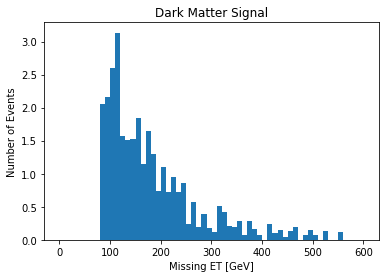

In [ ]:
#code to plot a histogram of the ETmiss (missing transverse energy) of DM_300 (dark matter signal)
plt.hist(DM_300['ETmiss'], weights=DM_300['totalWeight'],bins=60, range = (0,601)) #makes a histogram from the ETmiss up to 600 GeV with 60 bins (bins are just the number of 'bars' in the plot)
plt.xlabel('Missing ET [GeV]') #x-axis label (with units)
plt.ylabel('Number of Events') #y-axis 
plt.title('Dark Matter Signal') #plot title
plt.show() #creates the plot

From this particular plot we are able to see how the dark matter signal events are spread out. Specifically this shows the missing transverse energy, which is the energy that the dark matter particles have when they leave the ATLAS detector without being detected.
<br>
<br>
We notice that the events start at 80 GeV, this is because when the files we are using were created, something called a pre-selection was done. A pre-selection is when events are removed before performing a search - part of the pre-selection done on our files was to remove events with missing $E_T$ below 80 GeV.
<br>
<br>
<font color="red">QUIZ:</font> Hit play below and answer the question to understand why histograms can be helpful!

In [ ]:
#@title
print("             Why are histograms useful?")
out = widgets.Dropdown(options=[('They\'re not, they\'re boring',0),('They help us see paterns in data',1),('They show the history of data',0),('They let us compare different data',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

             Why are histograms useful?



Let's make another plot of the missing transverse energy, except this time we will use the ZZ background file.
<br>
<br>
<font color = "red">TASK:</font> Fill out the gaps in the below code to create the ZZ plot:

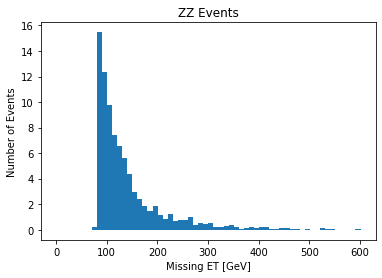

In [ ]:
#replace the "..." with what is appropriate to complete the code
plt.hist(ZZ['ETmiss'], weights=ZZ['totalWeight'],bins=60, range = (0,601)) #makes a histogram from the ETmiss up to 600 GeV with 60 bins (bins are just the number of 'bars' in the plot)
plt.xlabel('Missing ET [GeV]') #x-axis label (with units)
plt.ylabel('Number of Events') #y-axis 
plt.title('ZZ Events') #plot title
plt.show() #creates the plot

What can we notice here? (put a conclusion here later on the difference/similarity of the plots)
<br>
<br>
Let's make one more histogram plot, but this time you have to write out the code yourself. Use the ZZ background file in this plot also, but instead of missing transverse energy (ETmiss) we want to plot transverse momentum of the leading lepton (lead_lep_pt), which has units of GeV.

<html>
<details>
<summary style="color:orange; font-weight: bold;">3.1.1 What does the transverse momentum of the leading lepton mean?</summary>
As we discussed earlier, the signature we are looking for is that of two leptons and missing transverse energy. Of these two leptons, one reaches the detector first with more (transverse) momentum - this is our leading lepton.
</details>
</html>


<font color = "red">TASK:</font> Write the code to make a plot of the lead_lep_pt variable using the ZZ file!

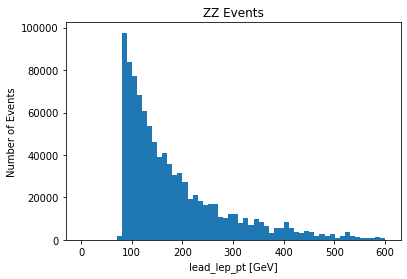

In [ ]:
#write code to plot a histogram of lead_lep_pt for the lead_lep_pt background file
plt.hist(ZZ['ETmiss'], weights=ZZ['lead_lep_pt'],bins=60, range = (0,601)) #makes a histogram from the ETmiss up to 600 GeV with 60 bins (bins are just the number of 'bars' in the plot)
plt.xlabel('lead_lep_pt [GeV]') #x-axis label (with units)
plt.ylabel('Number of Events') #y-axis 
plt.title('ZZ Events') #plot title
plt.show() #creates the plot

Great job on programming this plot yourself! :D
<br>
<br>
We have quite a few columns of information for each file, if we plotted histograms for all these columns and for every file, we would have so many histgrams that we would be confused about how to analyze them! So let's look at a way to make things clearer.
<br>
### 3.2 - Stacked histograms
It's confusing to look from one plot to another constantly, so let's put our histograms together to make comparison easier, this called a stacked histogram.
<br>
<br>
Before we plot a stacked histogram, let's put our dataframes in a list, this will make it easier to go through all of them using code. Hit play on the below code to initialise some variables that we'll be using.

In [ ]:
our_dataframes = [NR_ll, Z_jets, WZ, ZZ, DM_300] #we put our event information in a list, making it easier to look through all of it at once using a loop
dataframe_names = ['NR_ll','Z_jets','WZ','ZZ','DM_300'] #this list just has the names of the dataframes so we can make labels

Now let's run the below code to make a stacked histogram of the missing transverse energy (ETmiss) using our dark matter signal and all of our backgrounds.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


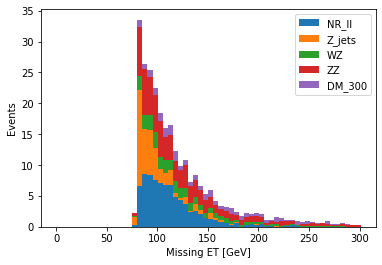

In [ ]:
stacked_variable = [] #list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['ETmiss'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight'])

plt.hist(stacked_variable,weights=stacked_weights, label=dataframe_names, stacked=True, bins=60, range = (0,301)) #this plots our stacked histogram (see stacked=True) with labels from the list of our dataframes
#note that there are events past 300, but we won't look at them as it's not super relevant to what we're doing
plt.xlabel('Missing ET [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.show()

### 3.3 - Significance
We are able to see that we have some dark matter signal in purple above, but now we need to check if this is enough to count as evidence for dark matter. The way we do this is by checking what we call the statistical significance of the dark matter signal compared to the background. Let's have a look at what statistical significance means in this case.
<br>
<br>
Our significance equation (which you can find the equation at the top of page 6 [here](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf)) actually calculates the standard deviation! We'll be using the below equation:
<br>
<br>
$\frac{\text{Total Signal Weight}}{\sqrt{\text{Total Background Weights}}}$
<br>
<br>
So we can see that significance has an actual value that has to be calculated - because this significance is a statistical measure of how likely our theory is to be true, and not just an arbitrary way of saying we think we have something important.
<br>
<br>
Why is the standard deviation important to know? The standard deviation essentially tells us how likely something is - a high standard deviation means something is unlikely! This can be illustrated by the 68-95-99.7 rule. Take a look at the image below which explains the rule better.
<img src="https://miro.medium.com/max/954/1*qbIWZyXxjkWt7dQLJX3Tsg.png"></img>
<br>
What we see here is that there is a 0.3% chance for something to happen beyond 3 sigma. So if we are able to calculate a significance (which is the same as standard deviation in our case) of 3 or greater, this is pretty good evidence that our dark matter signal is true dark matter! 
<br>
<br>
So let's calculate the significance of what we have at the moment using the below code:


In [ ]:
signal_weight = 0
background_weight = 0
#we initialize these variables at zero

for i in range(0,4):
  background_weight += sum(our_dataframes[i]['totalWeight']) #adds the weight from the background files to the variable above

signal_weight += sum(our_dataframes[4]['totalWeight']) #adds the weight from the signal file to the variable above

significance = signal_weight/(np.sqrt(background_weight)) #does our calculation
significance

1.9756880920439481

We can see that this number is quite far from the significance of 3 that we are aiming for, so right now we can't say that we have evidence for dark matter.
<br>
<br>
What do we do now? Let's try a technique that will get rid of as much background as possible while leaving as much signal as possible, which should increase the significance of what we have.
<br>
<br>
<font color = "red">TASK:</font> Press play to check your knowledge on significance!

In [ ]:
#@title
print("         Why is a high significance important?")
out = widgets.Dropdown(options=[('A high significance means we have more important results',0),('A large significance means we have lots of signal',0),('A high significance means it is unlikely that our theory is a fluke',1)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

         Why is a high significance important?


## 4 - Cut-Based Analysis
This is the method that we will be using to improve our significance. Just like the name implies, this method cuts out parts of our data to try and get rid of as much background whilst keeping as much signal as possible.
<br>
What is a cut? Put simply, a cut is just a condition - the data that satisfies a condition is kept, and the rest we get rid of. A real world example of a cut would be a height restriction at a theme park - if your height is not greater than the minimum, you can't get on!
<br>
<br>
<img src="https://themeparkreview.com/forum/uploads/monthly_2011_03/SS4.jpg.fac76c1047781a89f79a59cb8dc018cc.jpg" style="width:50%;" align="right">
<!---man this really makes me want to go to thorpe park again T.T-->


Have a play with the [histogram analyser](http://opendata.atlas.cern/visualisations/analyser-js.php) from the ATLAS Open Data website to try out some cut-based analysis (by using the plots) for yourself to try and get as high of a Higgs significance as possible. Can you beat my significance of 0.467?
<!---I actually got about 0.73 after a quick attempt but added events to reduce the significance-->

### 4.1 - Which Cuts Should We Do?
We have a lot of events (rows in our dataframes), so we need to cut down how many we have. How are we going to choose what cuts we will use to do that? Fortunately, we can look at a paper from ATLAS to help us. Page 6 from [this paper](https://arxiv.org/pdf/1708.09624.pdf) has a table describing cuts performed on very similar simulated data files, and we will be basing our cuts on what they did in their similar analysis.
<br>


### 4.2 - Cut 1: Dilepton Invariant Mass ($m_{ll}$)

Let's break down what this term means before we do anything.
<br>
Dilepton refers to the two leptons that result from our collision. Invariant mass is the mass of something when it is not moving from the observer's point of view (which we call the observer's [*frame of reference*](https://www.youtube.com/watch?v=3yaZ7lkQPUQ)).
<br>
<br>
The video below has a description of invariant mass (also called rest mass) from 3:24 to 3:42

In [ ]:
#@title
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XkPudRiWspc" frameborder="0" allowfullscreen></iframe>')

Now that we understand dilepton invariant mass a bit better, let's make a plot of it below to see where the best place to make a cut is.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


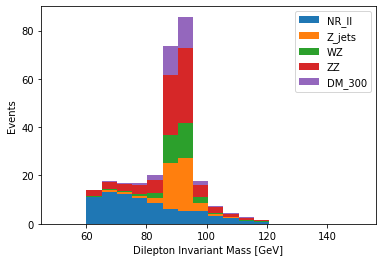

In [ ]:
stacked_variable = [] # list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['mll'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight']) #grabs weight info to be applied 

plt.hist(stacked_variable,weights=stacked_weights, label=dataframe_names, stacked=True, bins=20, range = (50,151)) #this plots our stacked histogram (see stacked=True) with labels from the list of our dataframes
plt.xlabel('Dilepton Invariant Mass [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.show()

Focusing on the dark matter signal, we can see that it peaks in one main area around the 90 GeV mark. This area of the plot corresponds to events where one Z particle decays into a pair of leptons, which lines up with the signature we are looking for. The reason that this peak occurs at 90 GeV is because the rest mass of the Z boson is 90 GeV. 
<br>
<br>
Now let's try to separate out this area of the graph. Press play on the cell below and use the slider to choose a range of values to keep in this plot.
<br>
<br>
<font color="red">TASK:</font> Press play below and use the sliders to choose the upper and lower limits for this cut.

In [ ]:
#@title
test = [] #this is a list that will hold the values shown on the slider
def readable_output(x): #this function lets us show+use the numbers on the slider
  test.append(x) #adds the values on the sliders to the above list
  return x #shows the numbers on the slider in the form (x,y)
widgets.interact(readable_output, x = widgets.IntRangeSlider(value=[50, 130],min=50,max=130,step=2,description='mll Cut:'))
#above creates the slider and makes it interact with our function above

interactive(children=(IntRangeSlider(value=(50, 130), description='mll Cut:', max=130, min=50, step=2), Output…

<function __main__.readable_output>


Now that you've chosen a range of values to keep, we can move on to performing the cut with the values you've chosen.

###### Retry cut?

Run the cell below to reload all of the files so that you can try your cut again

In [ ]:
#below reloads files to reset the changes
DM_300 = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/DM_300.csv')
NR_ll = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Non-resonant_ll.csv')
Z_jets = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Z+jets.csv')
WZ = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/WZ.csv')
ZZ = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/ZZ.csv')

our_dataframes = [NR_ll, Z_jets, WZ, ZZ, DM_300]

print("all files read!")

all files read!


#### 4.1.1 - Cut on $m_{ll}$
The below code cell contains the code to cut out the data that lies outside the range of values that you chose above. Run this code and then continue to see what affect it has!
<br>
<br>
<font color="red">TASK:</font> Run the below code to perform your first cut!
<br>
<br>
(Once you run this cell, you'll have to use the code hidden under 'Retry cut?' before you can change the cut values you've chosen.)

In [ ]:
cut_lower,cut_upper = test[-1] #this grabs the numbers on the slider

for i in our_dataframes: #goes over each dataframe
    cut_lb = list(i.index[i['mll']<cut_lower]) #list of the events below lower cut value
    cut_ub = list(i.index[i['mll']>cut_upper]) #list of the events above upper cut value
    #print(cut_lb,cut_ub) #you can uncomment to show which rows will be removed
    i.drop(cut_lb,inplace=True) 
    i.drop(cut_ub,inplace=True) #these two lines remove the events in the lists 

Just like that we've performed a cut!
<br>
Let's plot another histogram for the dilepton invariant mass to see what has changed as a result of our cut.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


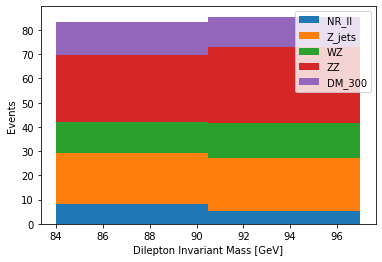

In [ ]:
stacked_variable = []
stacked_weights = []
bin_num = int((cut_upper-cut_lower)/5) #this calculates how many bins we need (as we want bins to only be 5 GeV wide)
for i in our_dataframes:
    info = i['mll']
    stacked_variable.append(info)
    stacked_weights.append(i['totalWeight'])

plt.hist(stacked_variable, weights=stacked_weights, label=dataframe_names, stacked=True, bins=bin_num, range = (cut_lower,(cut_upper+1)))#note that we use cut_upper+1, this +1 makes our bins land on whole numbers
plt.xlabel('Dilepton Invariant Mass [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.show()

What we are able to see here is that we now only have the events that are within the boundaries of the cut we set before. We can think of this like we have 'zoomed in' on the part of the $m_{ll}$ we are interested in.
<br> 
Now let's check the significance of the remaining events after the cut to see if we improved the valueby running the code below.

In [ ]:
signal_weight = 0
background_weight = 0

for i in range(0,4):
  background_weight += sum(our_dataframes[i]['totalWeight'])

signal_weight += sum(our_dataframes[4]['totalWeight'])
significance = signal_weight/(np.sqrt(background_weight))
significance

2.1834698424194507

How has the significance changed? Has it increased? Does it still fall short of our desired significance?
<br>
<br>
<font color="red">QUIZ:</font> Hit play below to check your knowledge!

In [ ]:
#@title
print("     What is the significance we want to reach?")
out = widgets.Dropdown(options=[('102',0),('5',0),('2',0),('3',1)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])


     What is the significance we want to reach?


Think you can change this cut to get a better significance? Go back to the "Retry?" drop-down to try make a different cut if you want to give it another go!
<br>
<br>
Run the below code to save the remaining events from the cut we made above (do this each time you change the above cut).

In [ ]:
after_cut1 = [] #we will store our cut in this list

for i in our_dataframes:
  after_cut1.append(i.copy()) #puts the information left after the cut into our list (in the same order)

In [ ]:
after_cut1[0]

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
4,0.109538,0,65.885367,44.978730,93.839008,89.863703,1.895747,3.011138,0.239739,0.528977,1
10,0.112637,0,61.673406,24.755430,85.910358,115.988398,1.984220,2.809724,0.115431,0.523514,1
12,0.105503,0,45.293863,34.080426,85.695352,82.401789,1.963753,2.501387,0.106023,0.616999,0
13,0.048246,0,68.902805,55.074973,91.246864,141.392781,1.663817,2.023530,0.015244,0.512675,1
23,0.141540,0,78.780336,51.641785,87.445657,116.939219,1.487192,2.257120,0.069899,0.748566,0
...,...,...,...,...,...,...,...,...,...,...,...
881,0.107300,0,76.976719,45.703629,90.830945,97.295523,1.738824,2.492883,0.036323,0.534526,1
882,0.104619,0,65.185609,39.103598,84.799716,96.417523,1.788814,3.041182,0.257759,0.624591,1
892,0.108394,0,107.582883,31.806594,92.790067,84.120219,1.817207,3.104781,0.198955,0.603491,0
895,0.099419,0,58.426281,42.640098,86.632724,107.272164,1.904570,2.410271,0.183341,0.660280,1


### 4.3 - Cut 2: Missing Transverse Energy ($E_{Tmiss}$)
Let's continue by making another cut to further improve our significance, this time we will do a cut on the missing transverse energy, $E_{Tmiss}$.
<br>
<br>
If we have a look at the paper we are basing our cuts on ([link](https://arxiv.org/pdf/1708.09624.pdf)), we see that the paper decides to keep all the events with missing $E_T$ above 90 GeV. As described in the paper, we make these cuts to try and reduce the amount of background events we have from the Non-resonant ll and Z+jets background files that we are using.
<br>
<br>
This makes sense, considering that the peak of the dark matter signal occurs around that point (remember the $m_{ll}$ graph we made earlier?). So now we will replicate that cut.
<br>
<br>
<font color="red">TASK:</font> Hit play and use the checkboxes to choose a cut to use! This cut will exclude any events below that threshold.

In [ ]:
#@title
selection = [] #here we store info on what button is currently pressed
def button_check(x):
  selection.append(x) #adds the output of the buttons to the list
widgets.interact(button_check, x = widgets.ToggleButtons(options=['80 GeV', '85 GeV', '90 GeV', '95 GeV', '100 GeV'], description='Missing Et:', button_style='info')) #creates buttons and lets them work with function

interactive(children=(ToggleButtons(button_style='info', description='Missing Et:', options=('80 GeV', '85 GeV…

<function __main__.button_check>

###### Retry cut?

Run the below code cell to retry the cut. This will revert back to the events we had after doing the first cut on $m_{ll}$.

In [ ]:
after_cut1 = [] #we will store our cut in this list

for i in our_dataframes:
  after_cut1.append(i.copy()) #puts the information left after the cut into our list (in the same order)

Now that you've selected your cut, we can now use it on the data, run the code cell below and see how the significance has changed.

#### 4.3.1 - Cut on $E_{Tmiss}$

<font color="red">TASK:</font> Run the code below to perform the cut on missing $E_T$ and calculate the significance after this cut!

In [ ]:
var = selection[-1]
for i in after_cut1: #goes over each dataframe (after it was cut earlier)
    if var=='80 GeV': #checks if you chose the 80 GeV button
        cut_val = list(i.index[i['ETmiss']<85]) #makes a list of events to drop accordingly
    elif var=='85 GeV':
        cut_val = list(i.index[i['ETmiss']<90])
    elif var=='90 GeV':
        cut_val = list(i.index[i['ETmiss']<90])
    elif var=='95 GeV':
        cut_val = list(i.index[i['ETmiss']<95])
    elif var=='100 GeV':
        cut_val = list(i.index[i['ETmiss']<100])
    #print(cut_val) #you can uncomment to show which rows will be removed
    i.drop(cut_val,inplace=True) #this line removes the events in the list


########################################Significance calculation below########################################


signal_weight = 0
background_weight = 0

for i in range(0,4):
  background_weight += sum(after_cut1[i]['totalWeight'])

signal_weight += sum(after_cut1[4]['totalWeight'])
significance = signal_weight/(np.sqrt(background_weight))
significance

2.302893841803374

We should be able to see that the significance has clearly been improved by performing this cut, but we're still a little bit off from the value of 3 that we want.
<br>
<br>
<font color="red">QUIZ:</font> Press play and check what you know about cuts!

In [ ]:
#@title
print("                Why are cuts useful?")
out = widgets.Dropdown(options=[('They\'re not useful, they hurt :(',0),('They reduce the amount of background while not reducing the signal',1),('They allow for easier analysis of datasets',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

                Why are cuts useful?


### 4.4 - Cut 3: $E_{Tmiss}/H_T$
Now we will further improve our significance by taking the cut we just did a step further by making it more advanced. We will do this by making a cut on the variable $E_{Tmiss}/H_T$. 
<br>
Let's break this down so we understand what this cut means. We already know that $E_{Tmiss}$ is the missing transverse energy, but what is $H_T$?
<br>
<br>
$H_T$ is the sum of all the momentum resulting from a collision, except for the missing $E_T$. If we take the ratio of the two, $E_{Tmiss}/H_T$, this becomes useful as it helps us identify dark matter events. Since our dark matter particles are invisible to the detector, the $E_{Tmiss}$ portion of this ratio should be relatively large, and thus the ratio should be large.
<br>
<br>
According to the paper, events with an $E_{Tmiss}/H_T$ ratio above **0.6** are kept. Let's recreate this cut below. We'll start off by saving our progress from the previous cut like before.

In [ ]:
after_cut2 = [] #we will store our cut in this list

for i in after_cut1:
  after_cut2.append(i.copy()) #puts the information left after the second cut into our list (in the same order)

Before we perform our next cut, let's recap and see what our dataframes look like - run the code beow to look at the dark matter dataframe. Can you see the difference in the number of events (rows) we have now?

In [ ]:
after_cut2[0]
#we can't just look at the DM_300 dataframe as it only shows what is left after the first cut on m_ll, so we look at what is left after cut 2
#[0] corresponds to the first dataframe saved in after_cut2 which is dark matter (we use the same order as in our_dataframes)

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,0.105282,0,74.309586,24.997199,77.254061,107.631898,1.631501,2.529770,0.082501,0.522169,0
1,0.044659,0,42.211266,39.014141,63.455503,110.599055,1.778189,2.052038,0.099824,0.519746,0
2,0.061775,0,41.247055,36.668691,61.233000,96.659000,1.806786,2.458205,0.216724,0.692539,1
3,0.099584,0,52.397883,34.778047,71.075619,147.588234,1.516179,2.175504,0.105462,0.819935,1
5,0.106309,0,60.944590,25.996211,66.213562,111.339953,1.678992,2.506307,0.151368,0.947891,1
...,...,...,...,...,...,...,...,...,...,...,...
893,0.094738,0,59.490461,34.818949,63.271295,97.490773,1.308618,2.611919,0.008674,0.513201,1
894,0.105788,0,38.412988,36.508047,65.064112,131.607156,1.685835,3.002953,0.163563,0.719223,0
895,0.099419,0,58.426281,42.640098,86.632724,107.272164,1.904570,2.410271,0.183341,0.660280,1
898,0.080416,0,75.841922,38.011613,63.086274,133.267266,1.242076,2.289461,0.072923,0.646050,1


This time you will write some of the code for the cut, similarly to how it would be done in an official analysis.
<br>
<br>
<font color="red">TASK:</font> Fill in the spaces in the code below to complete this cut - you will need to write the name of the column of the $E_{Tmiss}/H_T$ that is used in the dataframes, and you will also have to write in the value of the ratio above which events are kept.

In [ ]:
#fill in the parts that have ellipses (...) with the required bits of code

for i in after_cut2: #goes through the remaining events in the files after 2nd cut
    cut_val = list(i.index[i['ETmiss_over_HT']<0.6]) #finds all events with ETmiss/HT below our threshold
    i.drop(cut_val,inplace=True) #and removes them


########################################Significance calculation below########################################


signal_weight = 0
background_weight = 0

for i in range(0,4):
  background_weight += sum(after_cut2[i]['totalWeight'])

signal_weight += sum(after_cut2[4]['totalWeight'])
significance = signal_weight/(np.sqrt(background_weight))
significance

2.324716233783271

We've increased the significance even further now, great!!
<br>
<br>
In many applications this would be enough to prove what we are looking for, but in particle physics, we want to achieve a significance of 3 to have evidence of something.
<br>
<br>
<font color="red">QUIZ:</font> Press play below to learn a bit more about performing cuts!

In [ ]:
#@title
print("     Is it useful to do cuts on multiple variables?")
out = widgets.Dropdown(options=[('Yes, so the other variables don\'t feel left out',0),('No, it removes too much signal',0),('Yes, some variables remove certain background types better than others',1)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

     Is it useful to do cuts on multiple variables?


In [ ]:
#@title
print("     Why do cuts help increase the significance?")
out = widgets.Dropdown(options=[('Because cuts are important',0),('Because cuts can remove background events while preserving signal events',1),('Because cuts are a statistical analysis method',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

     Why do cuts help increase the significance?


### 5 - Conclusion

Cut-based analysis like what you have done in this notebook is a commonly used technique at ATLAS and CERN to look for new physics, such as dark matter in our case. However, in this case it is clearly not enough for us to find dark matter here - so what do we do?
<br>
<br>
Next, we will use a more powerful method to look for dark matter - machine learning. Continue to the next notebook to learn more!
<br>
<br>
The next notebook on machine learning is located [here]()!

### 6 - Extension Tasks
<br>

1. In this notebook the dark matter file we used was called DM_300, but what does the 300 refer to? This is an estimate of the hypothesised mass of the dark matter particle, and we have a range where this estimate can lie within.
<br><br>
Look at the website where we got our files from ([here](https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook)) and choose a different DM file to DM_300. Rewrite the code in section 2.3 to import that file instead. Now rerun the code in this notebook.
<br><br>
How do the cuts affect that file differently? Why do they have a different affect?<br><br>
2. If you had a look at the cuts performed in the ATLAS paper we are basing our cuts on ([page 6 here](https://arxiv.org/pdf/1708.09624.pdf)), you would have noticed we are only doing three of the cuts they have done.
<br><br>
Select another cut from the paper (you may need to read earlier in the paper if you don't understand the paper) and use the empty code cell below to perform that cut. You should also plot histograms before and after performing that cut.
<br><br>
Does this improve the significance? By how much? Can you see any differences between the histogram before and after making your cut?
<br><br>
3. The cuts we have are not in any specific order - but should they be in an order? Have another look at the histogram analyser ([here](http://opendata.atlas.cern/visualisations/analyser-js.php)). With each cut you make, you'll notice that the following cut has less effect on the significance - the effect of cuts are not independent of one another.
<br><br>
Use the empty code cell below to rewrite the cuts that you have made so far in the notebook, but in a different order.
<br><br>
Which order has the biggest impact on the significance when done first? What is the best order to do the cuts?
<br><br>
(having to work out things like this is another reason why machine learning is a useful technique as we would not have to do this)


In [ ]:
#use this code cell to perform the extension tasks

###7 - Credits and Liscensing

Project Lead: 		Kate Shaw
<br>
<br>
Project Supervisors: 	Meirin Oan Evans, Zöe Earnshaw, Thomas Stevenson
<br>
<br>
Developers: 		Christopher Comiskey-Erazo, Iago Rosetto, Oscar Jackson